# t-SNE (t-distributed Stochastic Neighbor Embedding)
**What is t-SNE?**
- t-SNE is a non-linear dimensionality reduction technique.

- It focuses on preserving local structure — similar data points stay close.

- Used primarily for visualization (e.g., in 2D or 3D).

- Does not preserve global distances well (unlike PCA).

| Feature                    | PCA                        | t-SNE                               |
| -------------------------- | -------------------------- | ----------------------------------- |
| Type                       | Linear                     | Non-linear                          |
| Goal                       | Maximize variance          | Preserve local neighborhood         |
| Speed                      | Fast                       | Slower                              |
| Use case                   | Preprocessing, compression | Visualization                       |
| Output interpretability    | Yes (linear combinations)  | No (no direct relation to features) |
| Preserves global structure | Yes                        | No                                  |
| Preserves local structure  | Partially                  | Very well                           |


# Importing Necessary Libraries
In this step, we import all the libraries and modules required for the task. These include:
- **pandas**: For handling and manipulating data.
- **matplotlib.pyplot**: For plotting graphs and visualizing data.
- **sklearn**: For machine learning algorithms, including the dataset, scaling, PCA, and t-SNE.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Step 1: Load the Dataset
We load the breast cancer dataset, which contains features about different cancer cases, and split it into `X` (features) and `y` (target labels: benign or malignant).


In [2]:
# Step 1: Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Step 2: Standardize Features
Standardizing the data is important because many machine learning algorithms work better when the data is centered around zero and has unit variance. Here, we standardize the features of the dataset using `StandardScaler`.


In [3]:
# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: PCA and t-SNE for Dimensionality Reduction
First, we apply **PCA** (Principal Component Analysis) to reduce the data’s dimensionality, helping us manage noise. After that, we use **t-SNE** to further reduce the dimensions while trying to preserve the relationships between similar data points.


In [4]:
# Step3: PCA to reduce noise (e.g., to 30 -> 10 dimensions)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Step 4: t-SNE Visualization
Now that we’ve reduced the dimensionality, we plot the 2D representation of the data obtained from t-SNE, coloring the points according to the target labels (malignant vs. benign).


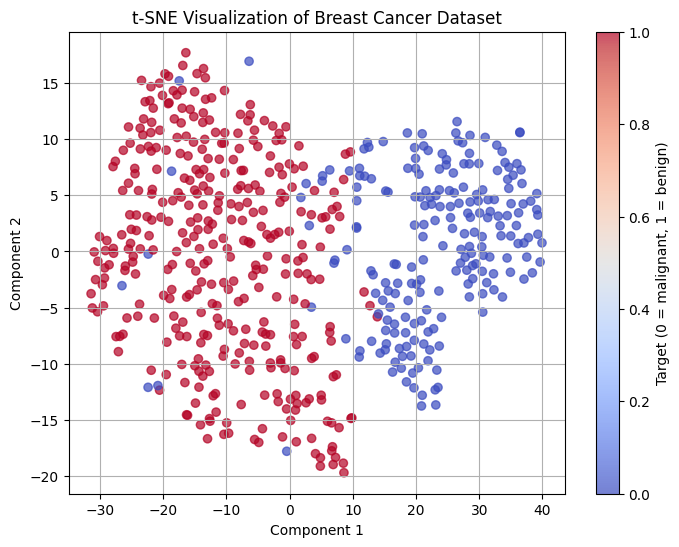

In [5]:
# Step 4: Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Target (0 = malignant, 1 = benign)')
plt.title("t-SNE Visualization of Breast Cancer Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

# Step 5: PCA Visualization
Similarly, we visualize the 2D projection of the data obtained from PCA, to compare how PCA and t-SNE represent the data differently.


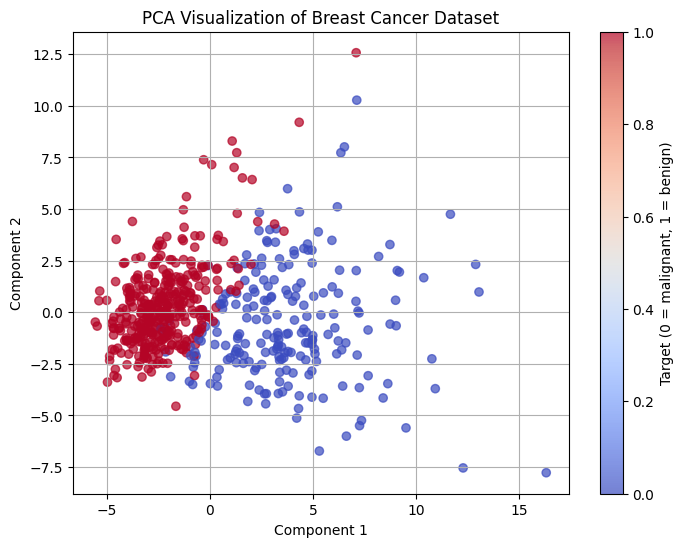

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Target (0 = malignant, 1 = benign)')
plt.title("PCA Visualization of Breast Cancer Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()